In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import classification_report

In [2]:
pokemon = pd.read_csv("pokemon.csv") # Dataset pokemon stats
combats = pd.read_csv("combats.csv") # Dataset pokemon battles and who won

In [3]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
pokemon.nunique()

#             800
Name          799
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

Text(0, 0.5, 'Frequency')

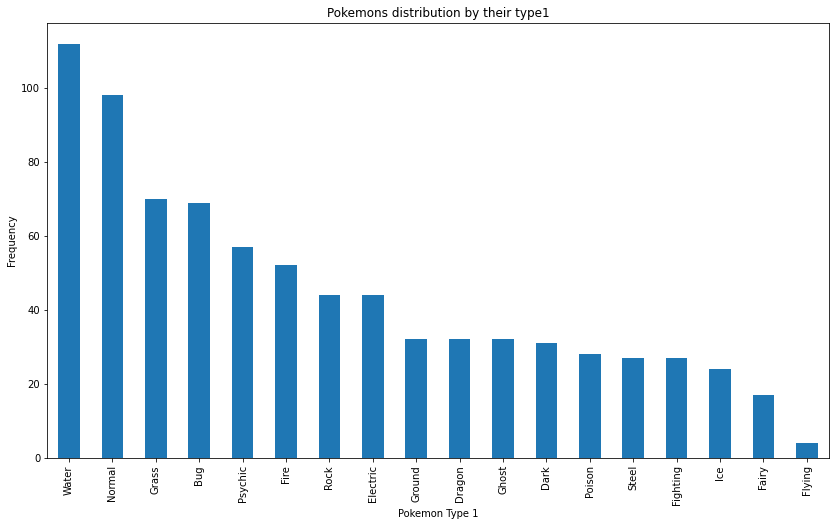

In [6]:
# Plot the number of pokemon present in each category of "type 1"
ax = pokemon['Type 1'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Pokemons distribution by their type1")
ax.set_xlabel("Pokemon Type 1")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

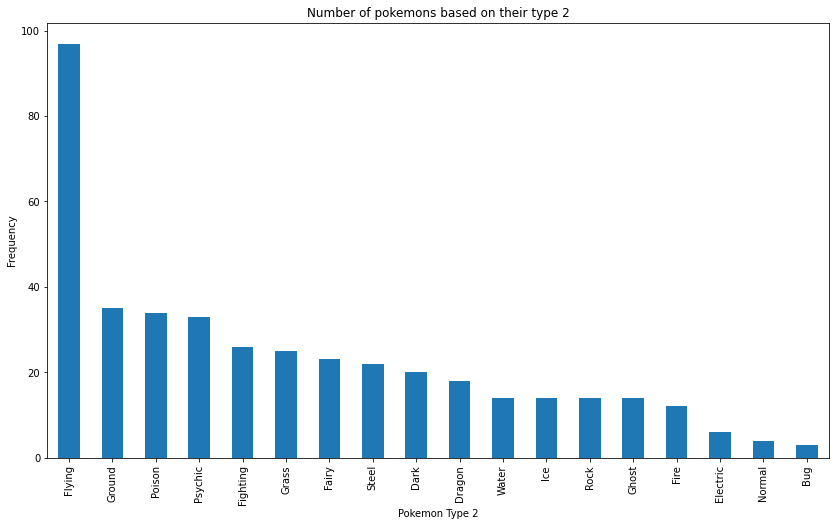

In [7]:
# Plot the number of pokemon present in each category of "type 1"
ax = pokemon['Type 2'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of pokemons based on their type 2")
ax.set_xlabel("Pokemon Type 2")
ax.set_ylabel("Frequency")

### Data Processing
check dtpyes for any strange type within the columns

In [8]:




print(pokemon.dtypes)

# Not every pokemon has a type 2
print(pokemon.loc[pokemon["Type 2"].str.contains('[^a-zA-Z]') != False].head())

# Some Pokemon Type 2 do not have a value assigned
pokemon["Type 2"] = pokemon["Type 2"].fillna("NA")


# Check if it was solved
print(pokemon.loc[pokemon["Type 2"].str.contains('[^a-zA-Z]') != False].head())

pokemon.dtypes

# Convert Legendary boolean column to int
pokemon["Legendary"]=pokemon["Legendary"].astype(int)
pokemon.head()

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object
     #        Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
4    5  Charmander   Fire    NaN  39      52       43       60       50   
5    6  Charmeleon   Fire    NaN  58      64       58       80       65   
9   10    Squirtle  Water    NaN  44      48       65       50       64   
10  11   Wartortle  Water    NaN  59      63       80       65       80   
11  12   Blastoise  Water    NaN  79      83      100       85      105   

    Speed  Generation  Legendary  
4      65           1      False  
5      80           1      False  
9      43           1      False  
10     58           1      False  
11     78           1      False  
Empty DataFrame
Columns: [#, Name, Type 1, Type 2, HP, Attack, Defense, S

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
4,5,Charmander,Fire,NA,39,52,43,60,50,65,1,0


In [9]:
# Use the Feature hashing to hash pokemon types to numeric values https://en.wikipedia.org/wiki/Feature_hashing

from sklearn.feature_extraction import FeatureHasher

h1 = FeatureHasher(n_features=5, input_type='string')
h2 = FeatureHasher(n_features=5, input_type='string')
d1 = h1.fit_transform(pokemon["Type 1"])
d2 = h2.fit_transform(pokemon["Type 2"])
# Convert to dataframe
d1 = pd.DataFrame(data=d1.toarray())
d2 = pd.DataFrame(data=d2.toarray())
# Drop Type 1 and Type 2 column from Pokemon dataset and concatenate the above two dataframes.
pokemon = pokemon.drop(columns = ["Type 1", "Type 2"])
pokemon = pd.concat([pokemon, d1, d2], axis=1)
pokemon

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,0,1,2,3,4,0,1,2,3,4
0,1,Bulbasaur,45,49,49,65,65,45,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
1,2,Ivysaur,60,62,63,80,80,60,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
2,3,Venusaur,80,82,83,100,100,80,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
3,4,Mega Venusaur,80,100,123,122,120,80,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
4,5,Charmander,39,52,43,60,50,65,1,0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,50,100,150,100,150,50,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
796,797,Mega Diancie,50,160,110,160,110,110,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
797,798,Hoopa Confined,80,110,60,150,130,70,6,1,-1.0,-2.0,-2.0,0.0,0.0,-1.0,0.0,0.0,1.0,-1.0
798,799,Hoopa Unbound,80,160,60,170,130,80,6,1,-1.0,-2.0,-2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [15]:
data = []
i = 0


# for each tuple of combats.csv
for t in combats.itertuples():
    i += 1
    first_pokemon = t[1] # get the first pokemon
    second_pokemon = t[2] # get the second pokemon
    winner = t[3]         # get the winner

    x = pokemon.loc[pokemon["#"]==first_pokemon].values[:, 2:][0] # get info about first pokemon
    print(x)
    y = pokemon.loc[pokemon["#"]==second_pokemon].values[:, 2:][0] # get info about second pokemon
    diff = (x-y)[:6] # difference between "base stats hp...."
    z = np.concatenate((x,y)) 
    if winner == first_pokemon:
        z = np.append(z, [0])
    else:
        z = np.append(z, [1])
        
    data.append(z)
    if i > 2:
        break
    
data = np.asarray(data)
X = data[:, :-1].astype(int)
y = data[:, -1].astype(int)

print(data)
print(pokemon.columns)

[50 64 50 45 50 41 2 0 0.0 -1.0 -1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0]
[91 90 72 90 129 108 5 1 2.0 0.0 0.0 0.0 -1.0 -1.0 -2.0 -2.0 -1.0 -2.0]
[55 40 85 80 105 40 2 0 2.0 -1.0 0.0 -1.0 1.0 0.0 -1.0 0.0 -1.0 0.0]
[[50 64 50 45 50 41 2 0 0.0 -1.0 -1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 70 70
  40 60 40 60 3 0 2.0 0.0 0.0 0.0 -1.0 2.0 0.0 0.0 0.0 0.0 1]
 [91 90 72 90 129 108 5 1 2.0 0.0 0.0 0.0 -1.0 -1.0 -2.0 -2.0 -1.0 -2.0
  91 129 90 72 90 108 5 1 0.0 -1.0 -1.0 1.0 1.0 -1.0 -2.0 -2.0 -1.0 -2.0
  1]
 [55 40 85 80 105 40 2 0 2.0 -1.0 0.0 -1.0 1.0 0.0 -1.0 0.0 -1.0 0.0 75
  75 75 125 95 40 5 0 -1.0 -2.0 -2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1]]
Index([         '#',       'Name',         'HP',     'Attack',    'Defense',
          'Sp. Atk',    'Sp. Def',      'Speed', 'Generation',  'Legendary',
                  0,            1,            2,            3,            4,
                  0,            1,            2,            3,            4],
      dtype='object')


In [23]:
from numpy import savetxt
savetxt('data.csv', data, delimiter=',')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(X_train,y_train)
pred = model.predict(X_test)
# print('Accuracy of {}:'.format(name), accuracy_score(pred, y_test))
print('Accuracy :', accuracy_score(pred, y_test))
print(classification_report(y_test, pred))

Accuracy : 0.9452
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5941
           1       0.95      0.95      0.95      6559

    accuracy                           0.95     12500
   macro avg       0.95      0.95      0.95     12500
weighted avg       0.95      0.95      0.95     12500



# Lab 4 - Multi-class Classification (linear vs nonlinear approach) 

## PART 1: One-vs-all multi-class classification with Logistic Regression - linear approach
Objectives: Implementation of one-vs-all Logistic Regression (linear approach) to recognize hand-written digits (from 0 to 9) from images. 

**Problem**: Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This assignment will show you how the methods you've learned can be used for this classification task. In this part, you will extend your previous implementation of Logistic Regression and apply it to one-vs-all classification.

In [13]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat

### Computing the Cost Function

Recall that the regularized cost function in logistic regression is:

$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2$

The cost gradients are (remember that the gradient of $\theta_0$ is not regularized): 

$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ for $j=0$

$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j$ for $j\geq 1$

In [14]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    gz= 1 / (1 + np.exp(-z))
    
    return gz

In [15]:
# mat is a dict with key "X" for x-values, and key "y" for y values
m= len(y)

In [16]:
 def costFunctionReg(X, y, theta, Lambda):
    """
    Take in numpy array of  data X, labels y and theta, to return the regularized cost function and gradients
    of the logistic regression classifier
    """
    
    #number of training examples 
    m=len(y)
    z = np.dot(X, theta)   
    #vector of the model predictions for all training examples      
    h = sigmoid(z)
         
    
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
    
    #cost function without regularization term
    cost = sum(error)/m
    
    #add regularization term to the cost function L2 norm
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    #gradient of theta_0
    grad_0= (1/m) * np.dot(X.transpose(),(h - y))[0]
    
    #vector of gradients of theta_j from j=1:n (adding the regularization term of the gradient)
    grad = (1/m) * np.dot(X.transpose(),(h - y))[1:] + (Lambda/m)* theta[1:]
       
    # all gradients in a column vector shape
    grad_all=np.append(grad_0,grad)
    grad_all = grad_all.reshape((len(grad_all), 1))
    
    return regCost[0], grad_all

### Test for correct implementation of costFunctionReg

In [17]:
#test with generated data

theta_t = np.array([-2,-1,1,2]).reshape(4,1)

X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t= np.append(np.ones((5,1)),X_t,axis=1)

y_t = np.array([1,0,1,0,1]).reshape(5,1)

cost, grad = costFunctionReg(X_t, y_t, theta_t, 3)

print("Cost:",round(cost,3))        #ANSWER: Cost: 2.535
print("\n Gradients:\n",grad,"\n \n Expected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: 2.535

 Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
 
 Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [18]:
# Add gradientDescent FUNCTION from the previous lab (the function that returns the optimal theta vector and J_history)
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    J_history =[]
    
    for i in range(num_iters):
        
        #call CostFunctionReg 
        cost, grad = costFunctionReg(X, y, theta, Lambda)
        
        #update theta
        theta = theta - alpha * grad
        
        J_history.append(cost)
    
    return theta , J_history



### One-vs-all Classification

You will implement one-vs-all classification by training multiple Regularized Logistic Regression classifiers, one for each of the K classes in the MNIST dataset. 

In the handwritten digits dataset, K = 10, but your code should work for any value of K. You should complete the code in function *oneVsAll* to train one classier for each class. 

Your code should return all the classifier parameters in a Kx(n+1) matrix *all_theta*, where each row corresponds to the learned Logistic Regression parameters for one class. You can do this with a for-loop from 1 to K, training each classifier independently.

Note that the y argument to this function is a vector of labels from 1 to 10, where we have mapped the digit “0" to the label 10. When training the classifier for class i you will transform  vector y, with shape (m, 1), in a binary vector, where only for examples with label i, y gets value = 1, and for all other labels (not class i), y gets value = 0. 

Logical arrays are helpful for this task, e.g. y=np.where(y==i,1,0). 


In [19]:
def oneVsAll(X, y, initial_theta, alpha, num_iters, Lambda, K):
    """
    Inputs:
    numpy array of data X and labels y
    initial_theta - inicialized vector of model parameters theta 
    alpha - learning rate
    num_iters - number of iterations
    Lambda - regularization parameter 
    K -number of classes
    
    ONEVSALL trains K Logistic Regression classifiers using gradient descent. 
    
    Returns:   
    all_theta - Kxn matrix where i-th row corresponds to the i-th classifier, n parameters
    all_J - the evolution of cost function during each iteration (J_history) for all K classifiers
    
    """
    all_theta = []
    all_J=[]
    
    #number of training examples
    m=len(y)
    
    #number of features
    n=X.shape[1]
    
    # add an extra column of 1´s corresponding to xo=1 (aka intercept term)
    X = np.append(np.ones((m,1)), X, axis=1)
    
    for i in range(1,K+1):
        print(i)
        theta , J_history = gradientDescent(X,np.where(y==i,1,0),initial_theta,alpha,num_iters,Lambda)
        
        # sdd the vector of optimized parameters theta of classifier i
        all_theta.extend(theta)
                
        # add the cost function history of classifier i
        all_J.extend(J_history)
        
    return np.array(all_theta).reshape(K,n+1), all_J

In [20]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#Inicialize vector theta =0est_split(X, y, test_size=0.1, random_state=29)

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)


0.8868

In [31]:
X_train = X[:5000,:]
y_train = y[:5000]
X_train_final = np.append(X_train[:, 6:16] , X_train[:, -10:], 1)
print(X_train[0])
print(X_train_final[0])


[50 64 50 45 50 41  2  0  0 -1 -1  1  1  1  0  1  1  1 70 70 40 60 40 60
  3  0  2  0  0  0 -1  2  0  0  0  0]
[ 2  0  0 -1 -1  1  1  1  0  1  2  0  0  0 -1  2  0  0  0  0]


In [ ]:
y_train = y_train.reshape((y_train.shape[0],1))
print(X_train.shape)
print(y_train.shape)
X_train = np.append(np.ones((len(y_train),1)),X_train, axis=1)
print(X_train)

initial_theta = np.zeros((X_train.shape[1],1))

#Optimization hyper-parameters 
alpha=1 #learning rate
num_iters=300
Lambda=0.1

all_theta, all_J = oneVsAll(X, y, initial_theta, alpha, num_iters, Lambda, 1)

print(all_j)

(5000, 36)
(5000, 1)
[[  1.  50.  64. ...   0.   0.   0.]
 [  1.  91.  90. ...  -2.  -1.  -2.]
 [  1.  55.  40. ...   0.   0.   0.]
 ...
 [  1.  68.  85. ...   0.  -1.   0.]
 [  1.  65.  90. ...   0.   2.  -2.]
 [  1. 100. 100. ...   0.  -1.   1.]]
1


### Plot the Cost functions for all (K =10) classifiers 

In [ ]:
print(all_J)
plt.plot(all_J)  #All classifiers
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### One-vs-all Prediction

After training the one-vs-all classier, you can now use it to predict the digit contained in a given image. 

For each input, you should compute the probability that it belongs to each class using the trained logistic regression classifiers.
The  *predictOneVsAll* function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label (1, 2,..., or K) as the assigned class for this example.
Complete the code in *predictOneVsAll* use the trained (one-vs-all) classifiers to make predictions. You should see that the training set accuracy is about 91.5%. 


In [ ]:
def predictOneVsAll(all_theta, X):
    """
    Using all_theta, compute the probability of image X(i) for each class and predict the label
    
    return a vector of prediction
    """
    #number of training examples
    m=X.shape[0]
    
    # add an extra column of 1´s corresponding to xo=1 (aka intercept term)
    X = np.append(np.ones((m,1)), X, axis=1)
    
    predictions = np.dot (X, all_theta.T) # predictions.shape =(5000,10)  X(5000x401) * all_theta(401x10) = 5000x10
    #np.argmax returns indices of the max element of the array in a particular axis.
    #+1 in order to label 0 as 10. 
    return np.argmax(predictions,axis=1)+1

In [ ]:
pred = predictOneVsAll(all_theta, X)

#Check that pred.shape  = (5000,) => rank 1 array. You need to reshape it !!!
pred= pred.reshape((pred.shape[0],1))

# Expected Training Set Accuracy: 91.46 %

print("Training Set Accuracy:",sum(pred==y)[0]/m*100,"%")

In [ ]:
from sklearn.svm import SVC
X2 = pd.DataFrame(data, columns=[ i for i in pokemon.columns[2:]] + [ i for i in pokemon.columns[2:]] + ["Winner"])
#print(X2)
# C = 100
y = [arr[-1] for arr in data]
classifier = SVC(kernel="rbf", gamma=30)
classifier.fit(X2[:5000],np.ravel(y[:5000]))
print(classifier.score(X2,y))  #ANSWER arround 98% accuracy
